# Overview
1. Read enriched CVE CVSS v3 data
2. Plot different scatter plots of datasets of NVD CVE CVSS v3 and CISA KEV - by EPSS score vs CVSS v3 Base Score

In [78]:
# Need these for the logic
import pandas as pd
import csv

# Need these for the plots
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns

In [79]:
df = pd.read_csv('../data_out/CVSSData_enriched.csv.gz', compression="gzip")
df

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-1999-0095,1988-10-01,"The debug command in Sendmail is enabled, allo...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01157,False,False,False,False,5,10.0
1,CVE-1999-0082,1988-11-11,CWD ~root command in ftpd allows root access.,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.11698,False,False,False,False,5,10.0
2,CVE-1999-1471,1989-01-01,Buffer overflow in passwd in BSD based operati...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00043,False,False,False,False,5,7.2
3,CVE-1999-1122,1989-07-26,Vulnerability in restore in SunOS 4.0.3 and ea...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00061,False,False,False,False,5,4.6
4,CVE-1999-1467,1989-10-26,Vulnerability in rcp on SunOS 4.0.x allows rem...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00425,False,False,False,False,5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221301,CVE-2023-40411,2024-01-10,This issue was addressed with improved data pr...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,0.00000,False,False,False,False,5,5.5
221302,CVE-2023-42826,2024-01-10,The issue was addressed with improved checks. ...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['NVD-CWE-noinfo'],False,False,0.00000,False,False,False,False,5,7.8
221303,CVE-2023-41987,2024-01-10,This issue was addressed with improved checks....,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,0.00000,False,False,False,False,5,5.5
221304,CVE-2023-41994,2024-01-10,A logic issue was addressed with improved chec...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,0.00000,False,False,False,False,5,5.5


In [80]:

df_cisakev = df[df['cisa_kev'] == True]
df_cisakev

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
4640,CVE-2002-0367,2002-06-25,smss.exe debugging subsystem in Windows NT and...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00092,False,True,False,False,0,7.2
8608,CVE-2004-0210,2004-08-06,The POSIX component of Microsoft Windows NT an...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00121,False,True,False,False,0,7.2
9752,CVE-2004-1464,2004-12-31,Cisco IOS 12.2(15) and earlier allows remote a...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-noinfo'],False,False,0.01795,False,True,False,False,0,5.0
13226,CVE-2005-2773,2005-09-02,HP OpenView Network Node Manager 6.2 through 7...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.96609,False,True,False,False,0,7.5
16668,CVE-2006-1547,2006-03-30,ActionForm in Apache Software Foundation (ASF)...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01420,False,True,False,False,0,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218589,CVE-2023-49897,2023-12-06,An OS command injection vulnerability exists i...,NETWORK,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,...,['CWE-78'],False,False,0.00281,False,True,False,False,0,8.8
218816,CVE-2023-47565,2023-12-08,An OS command injection vulnerability has been...,NETWORK,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,...,['CWE-78'],False,False,0.01453,False,True,False,False,0,8.8
220223,CVE-2023-7024,2023-12-21,Heap buffer overflow in WebRTC in Google Chrom...,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['CWE-787'],False,False,0.00361,False,True,False,True,0,8.8
220328,CVE-2023-7101,2023-12-24,Spreadsheet::ParseExcel version 0.65 is a Perl...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['CWE-94'],False,False,0.02119,False,True,False,False,0,7.8


# Venn Diagrams
Show Venn diagram of Metasploit, Nuclei, CISA KEV CVEs, EPSS, NVD for CVSS v3 CVEs

In [81]:
set_cves_msrc = set(df[df['msrc'] == True].cve)
set_cves_gpz = set(df[df['gpz'] == True].cve)
set_cves_cisa_kev = set(df[df['cisa_kev'] == True].cve)
set_cves_metasploit= set(df[df['metasploit'] == True].cve)
set_cves_nuclei = set(df[df['nuclei'] == True].cve)
set_cves_exploitdb = set(df[df['exploitdb'] == True].cve)
set_cves_epss_01 = set(df[df['epss'] >= 0.1].cve)
set_cves_nvd = set(df.cve)



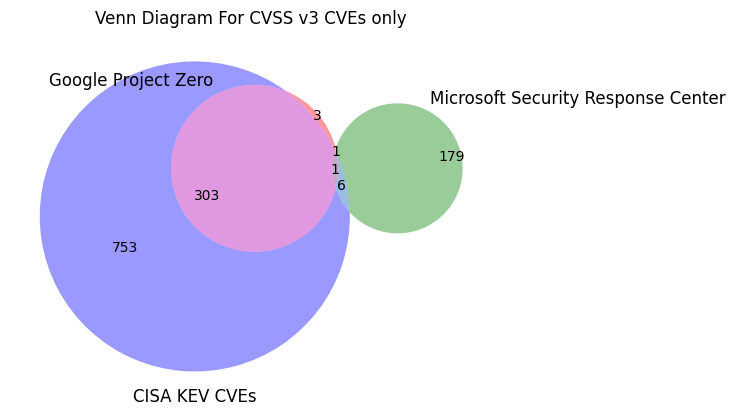

In [82]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_gpz, set_cves_msrc, set_cves_cisa_kev], ('Google Project Zero', 'Microsoft Security Response Center', 'CISA KEV CVEs'))



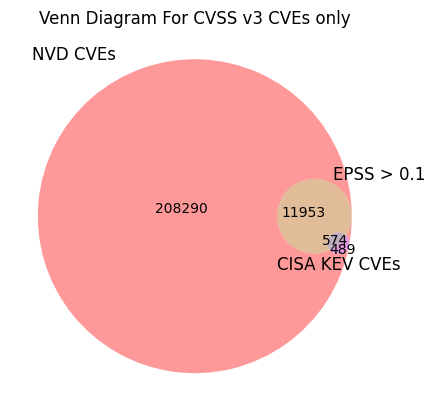

In [83]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_nvd, set_cves_epss_01, set_cves_cisa_kev], ('NVD CVEs', 'EPSS > 0.1', 'CISA KEV CVEs'))

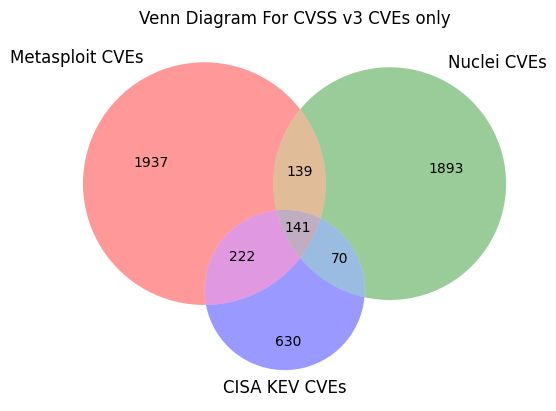

In [84]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_metasploit, set_cves_nuclei, set_cves_cisa_kev], ('Metasploit CVEs', 'Nuclei CVEs', 'CISA KEV CVEs'))

/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


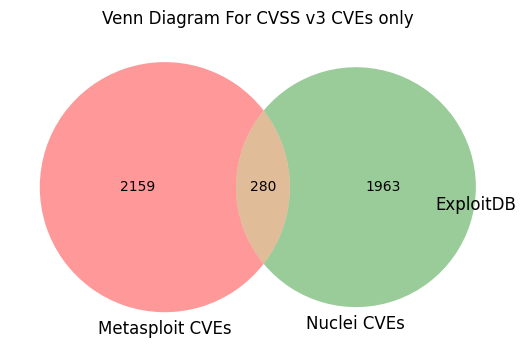

In [85]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_metasploit, set_cves_nuclei, set_cves_exploitdb], ('Metasploit CVEs', 'Nuclei CVEs', 'ExploitDB'))

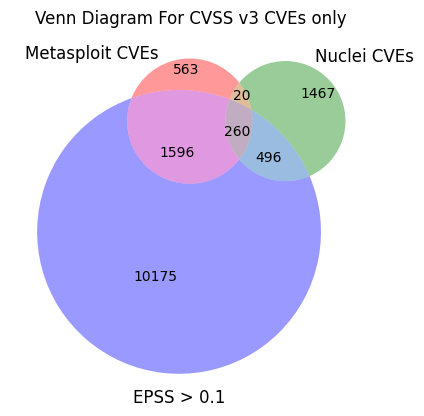

In [86]:
plt.title("Venn Diagram For CVSS v3 CVEs only")
venn3([set_cves_metasploit, set_cves_nuclei, set_cves_epss_01], ('Metasploit CVEs', 'Nuclei CVEs', 'EPSS > 0.1'))


# Scatter Plots

## NVD CVSS v3

In [87]:
def scatter_plot_cvss_epss (df, Title):
    palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

    g=sns.jointplot(data=df, x="BaseScore", y="epss", kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
    handles, labels = g.ax_joint.get_legend_handles_labels()
    g.ax_joint.legend(handles=handles, labels = ['CISA KEV', 'both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'], title="Exploit Type", loc='lower center', bbox_to_anchor=(1.5, 1))
    g.plot_marginals(sns.histplot, multiple="stack")
    g.fig.suptitle(Title)

/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(

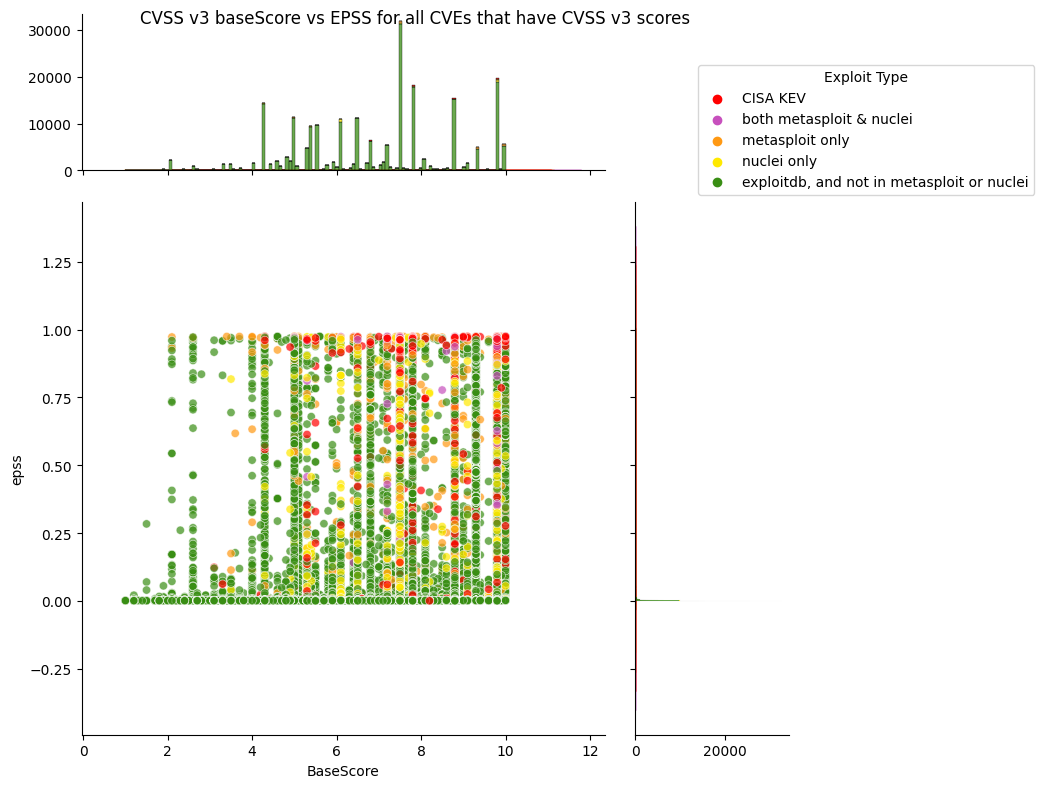

In [88]:
scatter_plot_cvss_epss(df, "CVSS v3 baseScore vs EPSS for all CVEs that have CVSS v3 scores")

/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(

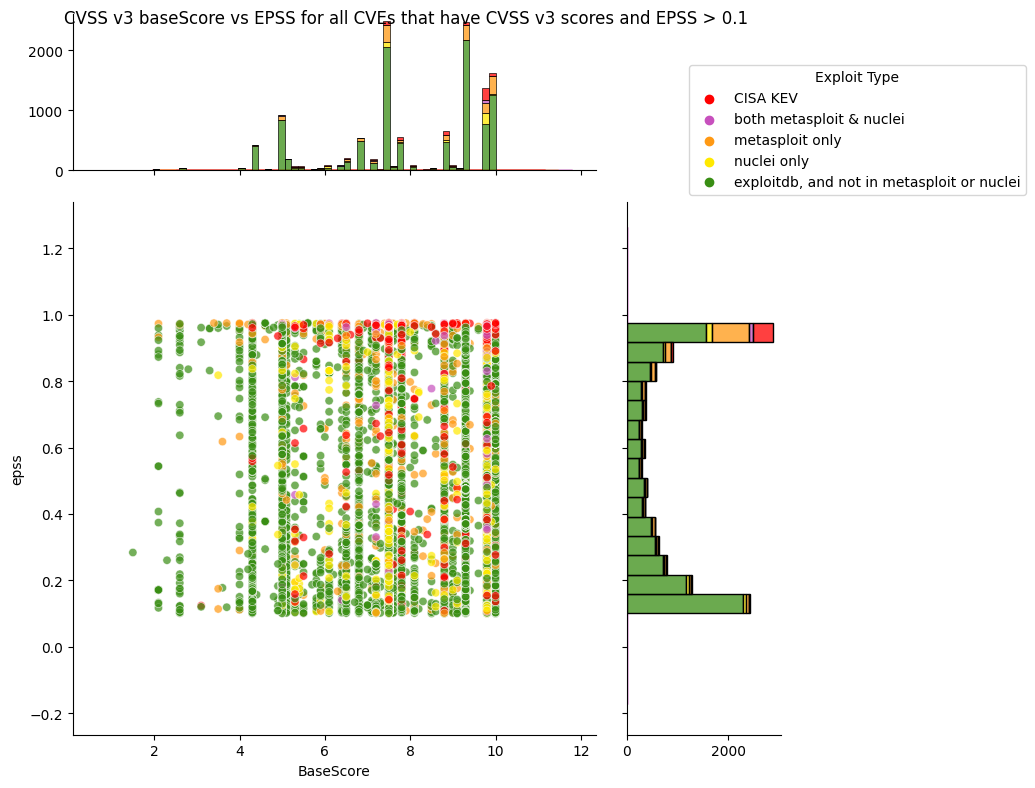

In [89]:
df_epss_01 = df[df["epss"]> 0.1]
scatter_plot_cvss_epss(df_epss_01, "CVSS v3 baseScore vs EPSS for all CVEs that have CVSS v3 scores and EPSS > 0.1")

## CISA KEV

In [90]:
# For CISA KEV plots remove cisa kev hue - otherwise everything would be the same color
def exploitatability_kev(cisa_kev, metasploit, nuclei, exploitdb):

    if (metasploit & nuclei):
        return 1
    elif (metasploit):
        return 2
    elif (nuclei):
        return 3
    elif (exploitdb):
        return 4
    else:
        return 5

In [91]:
df_cisakev["exploit_kev"]  = df_cisakev.apply(lambda x: exploitatability_kev(x['cisa_kev'], x['metasploit'], x['nuclei'], x['exploitdb']), axis=1)
df_cisakev

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_25346/365703250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cisakev["exploit_kev"]  = df_cisakev.apply(lambda x: exploitatability_kev(x['cisa_kev'], x['metasploit'], x['nuclei'], x['exploitdb']), axis=1)


,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore,exploit_kev
4640,CVE-2002-0367,2002-06-25,smss.exe debugging subsystem in Windows NT and...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,False,False,0.00092,False,True,False,False,0,7.2,5
8608,CVE-2004-0210,2004-08-06,The POSIX component of Microsoft Windows NT an...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,False,False,0.00121,False,True,False,False,0,7.2,5
9752,CVE-2004-1464,2004-12-31,Cisco IOS 12.2(15) and earlier allows remote a...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,False,False,0.01795,False,True,False,False,0,5.0,5
13226,CVE-2005-2773,2005-09-02,HP OpenView Network Node Manager 6.2 through 7...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,True,False,0.96609,False,True,False,False,0,7.5,2
16668,CVE-2006-1547,2006-03-30,ActionForm in Apache Software Foundation (ASF)...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,False,False,0.01420,False,True,False,False,0,7.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218589,CVE-2023-49897,2023-12-06,An OS command injection vulnerability exists i...,NETWORK,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,...,False,False,0.00281,False,True,False,False,0,8.8,5
218816,CVE-2023-47565,2023-12-08,An OS command injection vulnerability has been...,NETWORK,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,...,False,False,0.01453,False,True,False,False,0,8.8,5
220223,CVE-2023-7024,2023-12-21,Heap buffer overflow in WebRTC in Google Chrom...,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,False,False,0.00361,False,True,False,True,0,8.8,5
220328,CVE-2023-7101,2023-12-24,Spreadsheet::ParseExcel version 0.65 is a Perl...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,False,False,0.02119,False,True,False,False,0,7.8,5


In [92]:
# For CISA KEV plots remove cisa kev hue - otherwise everything would be the same color
def scatter_plot_cvss_epss_kev (df, Title):
    palette1 = ["#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

    g=sns.jointplot(data=df, x="BaseScore", y="epss", kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit_kev", palette=palette1)
    handles, labels = g.ax_joint.get_legend_handles_labels()
    g.ax_joint.legend(handles=handles, labels = ['both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'],  title="Exploit Type", loc='lower center', bbox_to_anchor=(1.5, 1))
    g.plot_marginals(sns.histplot, multiple="stack")
    g.fig.suptitle(Title)

/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(

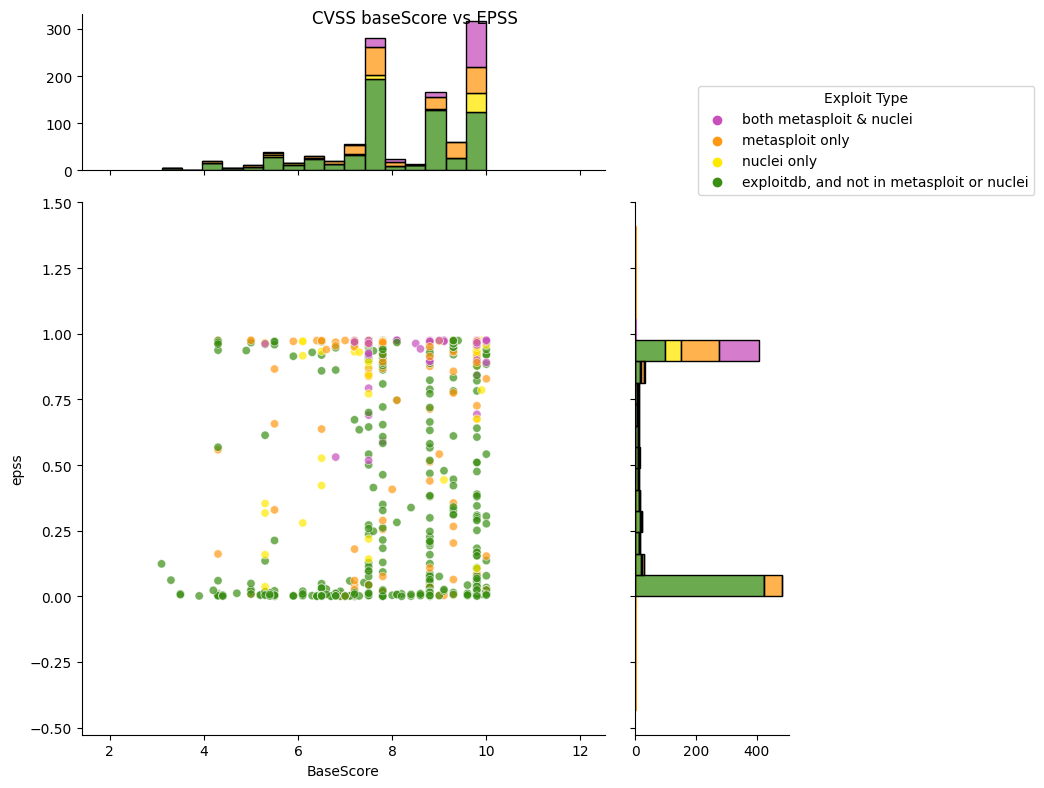

In [93]:
scatter_plot_cvss_epss_kev(df_cisakev, "CVSS baseScore vs EPSS")

## CISA KEV Cybersecurity Advisories (CSA)

CISA (Cybersecurity and Infrastructure Security Agency) co authors (with several international cybersecurity agencies) separate Cybersecurity Advisories (CSA) on the Top Routinely Exploited Vulnerabilities from the CISA KEV Catalog i.e. a subset of CISA KEV.



## 2022 Top 12

In [94]:
# https://www.cisa.gov/news-events/cybersecurity-advisories/aa23-215a
#  Top 12 Routinely Exploited Vulnerabilities in 2022 https://www.cisa.gov/news-events/cybersecurity-advisories/aa23-215a
# Release DateAugust 03, 2023
df_top_2022 = pd.read_csv("../data_in/cisa_kev/csa/cisa_kev_aug_22_top12.csv")
df_top_2022 = df_top_2022.rename(columns={"CVE": "cve"})
df_top_2022

,cve,Vendor,Product,Type,CWE
0,CVE-2018-13379,Fortinet,FortiOS and FortiProxy,SSL VPN credential exposure,CWE-22 Improper Limitation of a Pathname to a ...
1,CVE-2021-34473,Microsoft,Exchange Server,RCE,CWE-918 Server-Side Request Forgery (SSRF)
2,CVE-2021-31207,Microsoft,Exchange Server,Security Feature Bypass,CWE-22 Improper Limitation of a Pathname to a ...
3,CVE-2021-34523,Microsoft,Exchange Server,Elevation of Privilege,CWE-287 Improper Authentication
4,CVE-2021-40539,Zoho ManageEngine,ADSelfService Plus,RCE Authentication Bypass,CWE-287 Improper Authentication
5,CVE-2021-26084,Atlassian,Confluence Server and Data Center,Arbitrary code execution,CWE-74 Improper Neutralization of Special Elem...
6,CVE-2021-44228,Apache,Log4j2,RCE,CWE-917 Improper Neutralization of Special Ele...
7,CVE-2022-22954,VMware,Workspace ONE Access and Identity Manager,RCE,CWE-94 Improper Control of Generation of Code ...
8,CVE-2022-22960,VMware,"Workspace ONE Access, Identity Manager, and vR...",Improper Privilege Management,CWE-269 Improper Privilege Management
9,CVE-2022-1388,F5 Networks,BIG-IP,Missing Authentication Vulnerability,CWE-306 Missing Authentication for Critical Fu...


In [95]:
df_top_2022 = pd.merge(df_top_2022, df_cisakev, on='cve', how='left').fillna(False)
df_top_2022

,cve,Vendor,Product,Type,CWE,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,...,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore,exploit_kev
0,CVE-2018-13379,Fortinet,FortiOS and FortiProxy,SSL VPN credential exposure,CWE-22 Improper Limitation of a Pathname to a ...,2019-06-04,An Improper Limitation of a Pathname to a Rest...,NETWORK,LOW,NONE,...,True,True,0.97305,False,True,False,False,0,9.8,1
1,CVE-2021-34473,Microsoft,Exchange Server,RCE,CWE-918 Server-Side Request Forgery (SSRF),2021-07-14,Microsoft Exchange Server Remote Code Executio...,NETWORK,LOW,NONE,...,True,True,0.97078,False,True,False,False,0,9.1,1
2,CVE-2021-31207,Microsoft,Exchange Server,Security Feature Bypass,CWE-22 Improper Limitation of a Pathname to a ...,2021-05-11,Microsoft Exchange Server Security Feature Byp...,NETWORK,HIGH,HIGH,...,True,False,0.93973,False,True,True,False,0,6.6,2
3,CVE-2021-34523,Microsoft,Exchange Server,Elevation of Privilege,CWE-287 Improper Authentication,2021-07-14,Microsoft Exchange Server Elevation of Privile...,LOCAL,LOW,NONE,...,True,False,0.54148,False,True,False,False,0,9.0,2
4,CVE-2021-40539,Zoho ManageEngine,ADSelfService Plus,RCE Authentication Bypass,CWE-287 Improper Authentication,2021-09-07,Zoho ManageEngine ADSelfService Plus version 6...,NETWORK,LOW,NONE,...,True,True,0.97412,False,True,False,False,0,9.8,1
5,CVE-2021-26084,Atlassian,Confluence Server and Data Center,Arbitrary code execution,CWE-74 Improper Neutralization of Special Elem...,2021-08-30,In affected versions of Confluence Server and ...,NETWORK,LOW,NONE,...,True,True,0.97235,False,True,False,False,0,9.8,1
6,CVE-2021-44228,Apache,Log4j2,RCE,CWE-917 Improper Neutralization of Special Ele...,2021-12-10,Apache Log4j2 2.0-beta9 through 2.15.0 (exclud...,NETWORK,LOW,NONE,...,True,True,0.97466,False,True,False,False,0,10.0,1
7,CVE-2022-22954,VMware,Workspace ONE Access and Identity Manager,RCE,CWE-94 Improper Control of Generation of Code ...,2022-04-11,VMware Workspace ONE Access and Identity Manag...,NETWORK,LOW,NONE,...,True,True,0.97393,False,True,False,False,0,9.8,1
8,CVE-2022-22960,VMware,"Workspace ONE Access, Identity Manager, and vR...",Improper Privilege Management,CWE-269 Improper Privilege Management,2022-04-13,"VMware Workspace ONE Access, Identity Manager ...",LOCAL,LOW,LOW,...,True,False,0.00078,False,True,False,False,0,7.8,2
9,CVE-2022-1388,F5 Networks,BIG-IP,Missing Authentication Vulnerability,CWE-306 Missing Authentication for Critical Fu...,2022-05-05,On F5 BIG-IP 16.1.x versions prior to 16.1.2.2...,NETWORK,LOW,NONE,...,True,True,0.97334,False,True,False,False,0,9.8,1


/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  func(

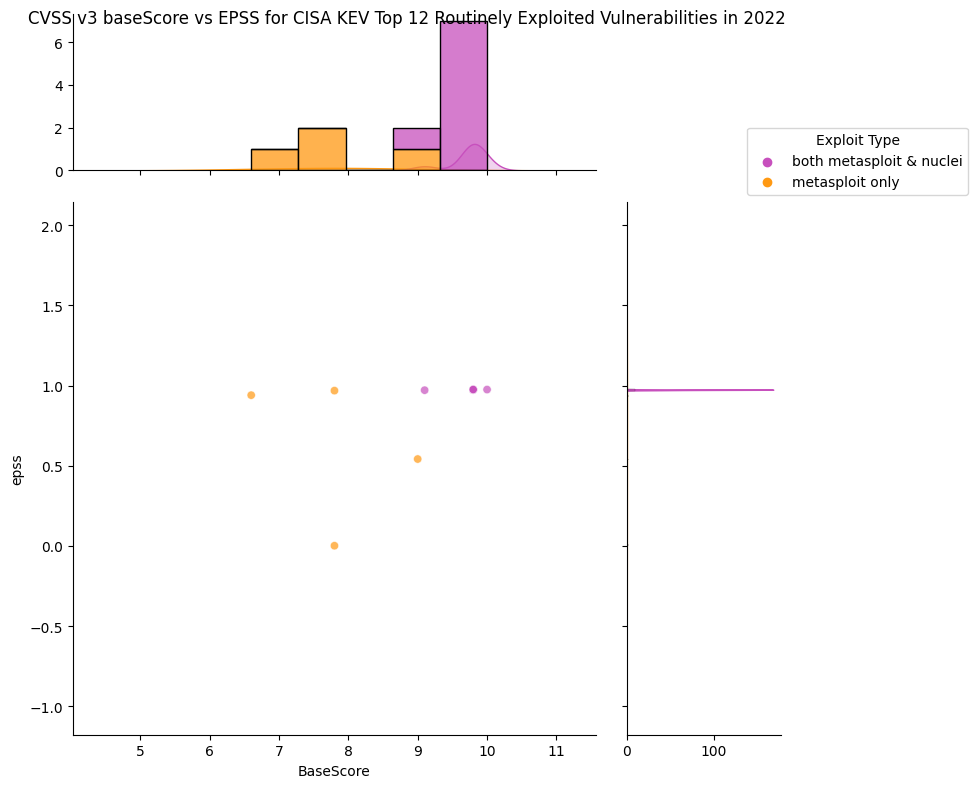

In [96]:
scatter_plot_cvss_epss_kev(df_top_2022, "CVSS v3 baseScore vs EPSS for CISA KEV Top 12 Routinely Exploited Vulnerabilities in 2022")

## 2022 Other

In [97]:
df_top_2022_other = pd.read_csv("../data_in/cisa_kev/csa/cisa_kev_aug_22_other.csv")
df_top_2022_other = df_top_2022_other.rename(columns={"CVE": "cve"})
df_top_2022_other

,cve,Vendor,Product,Type,CWE
0,CVE-2017-0199,Microsoft,Multiple Products,Arbitrary Code Execution,None Listed
1,CVE-2017-11882,Microsoft,Exchange Server,Arbitrary Code Execution,CWE-119: Improper Restriction of Operations wi...
2,CVE-2019-11510,Ivanti,Pulse Secure Pulse Connect Secure,Arbitrary File Reading,CWE-22: Improper Limitation of a Pathname to a...
3,CVE-2019-0708,Microsoft,Remote Desktop Services,RCE,CWE-416: Use After Free
4,CVE-2019-19781,Citrix,Application Delivery Controller and Gateway,Arbitrary Code Execution,CWE-22: Improper Limitation of a Pathname to a...
5,CVE-2020-5902,F5 Networks,BIG-IP,RCE,CWE-22: Improper Limitation of a Pathname to a...
6,CVE-2020-1472,Microsoft,Multiple Products,Privilege Escalation,CWE-330: Use of Insufficiently Random Values
7,CVE-2020-14882,Oracle,WebLogic Server,RCE,None Listed
8,CVE-2020-14883,Oracle,WebLogic Server,RCE,None Listed
9,CVE-2021-20016,SonicWALL,SSLVPN SMA100,SQL Injection,CWE-89: Improper Neutralization of Special Ele...


In [98]:
df_top_2022_other = pd.merge(df_top_2022_other, df_cisakev, on='cve', how='left').fillna(False)
df_top_2022_other

,cve,Vendor,Product,Type,CWE,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,...,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore,exploit_kev
0,CVE-2017-0199,Microsoft,Multiple Products,Arbitrary Code Execution,None Listed,2017-04-12,"Microsoft Office 2007 SP3, Microsoft Office 20...",LOCAL,LOW,NONE,...,True,False,0.97421,False,True,False,True,0,7.8,2
1,CVE-2017-11882,Microsoft,Exchange Server,Arbitrary Code Execution,CWE-119: Improper Restriction of Operations wi...,2017-11-15,"Microsoft Office 2007 Service Pack 3, Microsof...",LOCAL,LOW,NONE,...,True,False,0.97432,False,True,False,False,0,7.8,2
2,CVE-2019-11510,Ivanti,Pulse Secure Pulse Connect Secure,Arbitrary File Reading,CWE-22: Improper Limitation of a Pathname to a...,2019-05-08,In Pulse Secure Pulse Connect Secure (PCS) 8.2...,NETWORK,LOW,NONE,...,True,True,0.97284,False,True,False,False,0,10.0,1
3,CVE-2019-0708,Microsoft,Remote Desktop Services,RCE,CWE-416: Use After Free,2019-05-16,A remote code execution vulnerability exists i...,NETWORK,LOW,NONE,...,True,False,0.97496,False,True,False,False,0,9.8,2
4,CVE-2019-19781,Citrix,Application Delivery Controller and Gateway,Arbitrary Code Execution,CWE-22: Improper Limitation of a Pathname to a...,2019-12-27,An issue was discovered in Citrix Application ...,NETWORK,LOW,NONE,...,True,True,0.97485,False,True,False,False,0,9.8,1
5,CVE-2020-5902,F5 Networks,BIG-IP,RCE,CWE-22: Improper Limitation of a Pathname to a...,2020-07-01,"In BIG-IP versions 15.0.0-15.1.0.3, 14.1.0-14....",NETWORK,LOW,NONE,...,True,True,0.97555,False,True,False,False,0,9.8,1
6,CVE-2020-1472,Microsoft,Multiple Products,Privilege Escalation,CWE-330: Use of Insufficiently Random Values,2020-08-17,<p>An elevation of privilege vulnerability exi...,LOCAL,LOW,LOW,...,True,False,0.32915,False,True,False,False,0,5.5,2
7,CVE-2020-14882,Oracle,WebLogic Server,RCE,None Listed,2020-10-21,Vulnerability in the Oracle WebLogic Server pr...,NETWORK,LOW,NONE,...,True,True,0.97390,False,True,False,False,0,9.8,1
8,CVE-2020-14883,Oracle,WebLogic Server,RCE,None Listed,2020-10-21,Vulnerability in the Oracle WebLogic Server pr...,NETWORK,LOW,HIGH,...,True,True,0.97297,False,True,False,False,0,7.2,1
9,CVE-2021-20016,SonicWALL,SSLVPN SMA100,SQL Injection,CWE-89: Improper Neutralization of Special Ele...,2021-02-04,A SQL-Injection vulnerability in the SonicWall...,NETWORK,LOW,NONE,...,False,False,0.02260,False,True,False,False,0,9.8,5


/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(

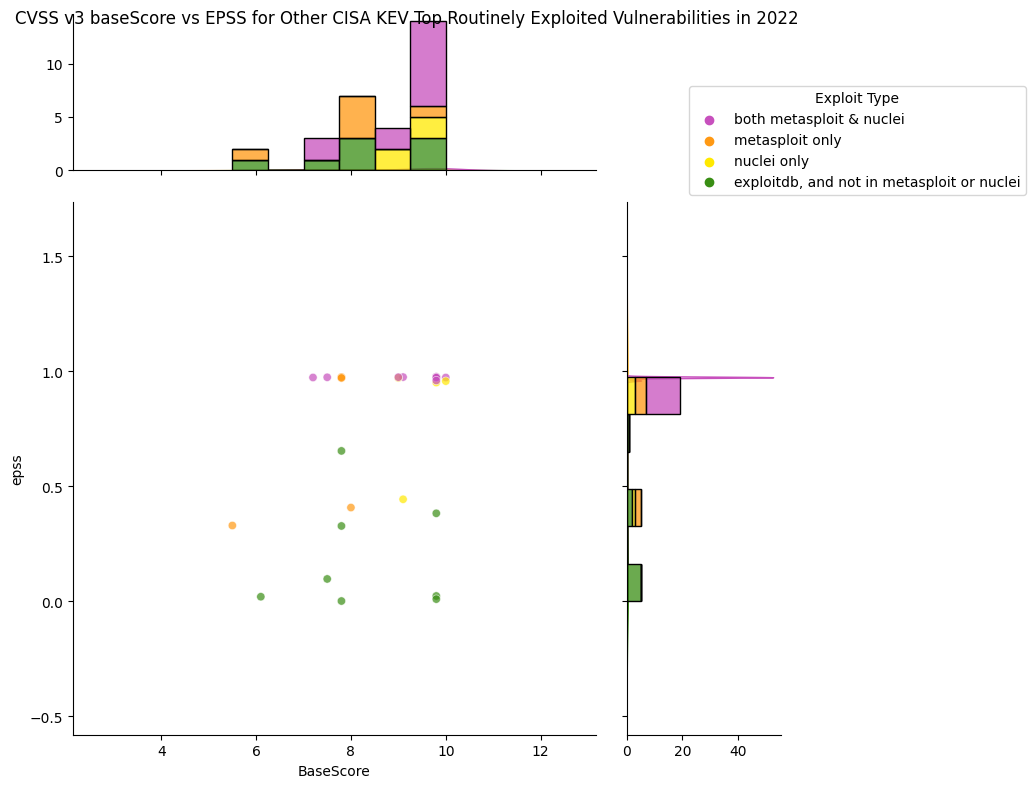

In [99]:
scatter_plot_cvss_epss_kev(df_top_2022_other, "CVSS v3 baseScore vs EPSS for Other CISA KEV Top Routinely Exploited Vulnerabilities in 2022")

## All 

In [100]:
df = pd.merge(df_top_2022_other[['cve']], df_top_2022[['cve']], on='cve', how='outer').fillna(False)
df

,cve
0,CVE-2017-0199
1,CVE-2017-11882
2,CVE-2019-11510
3,CVE-2019-0708
4,CVE-2019-19781
5,CVE-2020-5902
6,CVE-2020-1472
7,CVE-2020-14882
8,CVE-2020-14883
9,CVE-2021-20016


In [101]:
df_older_csas=pd.read_csv("../data_in/cisa_kev/csa/CISATopRoutinelyExploitedVulnerabilities.csv")
df_older_csas = df_older_csas.rename(columns={"CVE": "cve"})
df_older_csas


,Vendor and Product,cve,Type,Vulnerability Name,Alert,Period,url
0,Citrix,CVE-2019-19781,arbitrary code execution,NaN,AA21-209A,2020-2021,https://www.cisa.gov/uscert/ncas/alerts/aa21-209a
1,Pulse,CVE-2019-11510,arbitrary file reading,NaN,AA21-209A,2020-2021,https://www.cisa.gov/uscert/ncas/alerts/aa21-209a
2,Fortinet,CVE-2018-13379,path traversal,NaN,AA21-209A,2020-2021,https://www.cisa.gov/uscert/ncas/alerts/aa21-209a
3,F5- Big IP,CVE-2020-5902,remote code execution (RCE),NaN,AA21-209A,2020-2021,https://www.cisa.gov/uscert/ncas/alerts/aa21-209a
4,MobileIron,CVE-2020-15505,RCE,NaN,AA21-209A,2020-2021,https://www.cisa.gov/uscert/ncas/alerts/aa21-209a
...,...,...,...,...,...,...,...
73,ZOHO,CVE-2021-40539,Remote Code Execution,aa22-279a,2020-2022,https://www.cisa.gov/news-events/cybersecurit...,NaN
74,Microsoft,CVE-2021-26857,Remote Code Execution,aa22-279a,2020-2022,https://www.cisa.gov/news-events/cybersecurit...,NaN
75,Microsoft,CVE-2021-26858,Remote Code Execution,aa22-279a,2020-2022,https://www.cisa.gov/news-events/cybersecurit...,NaN
76,Microsoft,CVE-2021-27065,Remote Code Execution,aa22-279a,2020-2022,https://www.cisa.gov/news-events/cybersecurit...,NaN


In [102]:
df = pd.merge(df[['cve']], df_older_csas[['cve']], on='cve', how='outer').fillna(False)
df


,cve
0,CVE-2017-0199
1,CVE-2017-0199
2,CVE-2017-11882
3,CVE-2017-11882
4,CVE-2017-11882
...,...
93,CVE-2021-22005
94,CVE-2021-1497
95,CVE-2021-20090
96,CVE-2021-36260


In [103]:
df = pd.merge(df, df_cisakev, on='cve', how='left').fillna(False)
df

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore,exploit_kev
0,CVE-2017-0199,2017-04-12,"Microsoft Office 2007 SP3, Microsoft Office 20...",LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,True,False,0.97421,False,True,False,True,0,7.8,2
1,CVE-2017-0199,2017-04-12,"Microsoft Office 2007 SP3, Microsoft Office 20...",LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,True,False,0.97421,False,True,False,True,0,7.8,2
2,CVE-2017-11882,2017-11-15,"Microsoft Office 2007 Service Pack 3, Microsof...",LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,True,False,0.97432,False,True,False,False,0,7.8,2
3,CVE-2017-11882,2017-11-15,"Microsoft Office 2007 Service Pack 3, Microsof...",LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,True,False,0.97432,False,True,False,False,0,7.8,2
4,CVE-2017-11882,2017-11-15,"Microsoft Office 2007 Service Pack 3, Microsof...",LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,True,False,0.97432,False,True,False,False,0,7.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,CVE-2021-22005,2021-09-23,The vCenter Server contains an arbitrary file ...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,...,True,True,0.97289,False,True,False,False,0,9.8,1
94,CVE-2021-1497,2021-05-06,Multiple vulnerabilities in the web-based mana...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,...,True,True,0.97485,False,True,False,False,0,9.8,1
95,CVE-2021-20090,2021-04-29,A path traversal vulnerability in the web inte...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,...,False,True,0.97203,False,True,False,False,0,9.8,3
96,CVE-2021-36260,2021-09-22,A command injection vulnerability in the web s...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,...,True,True,0.97484,False,True,False,False,0,9.8,1


/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(

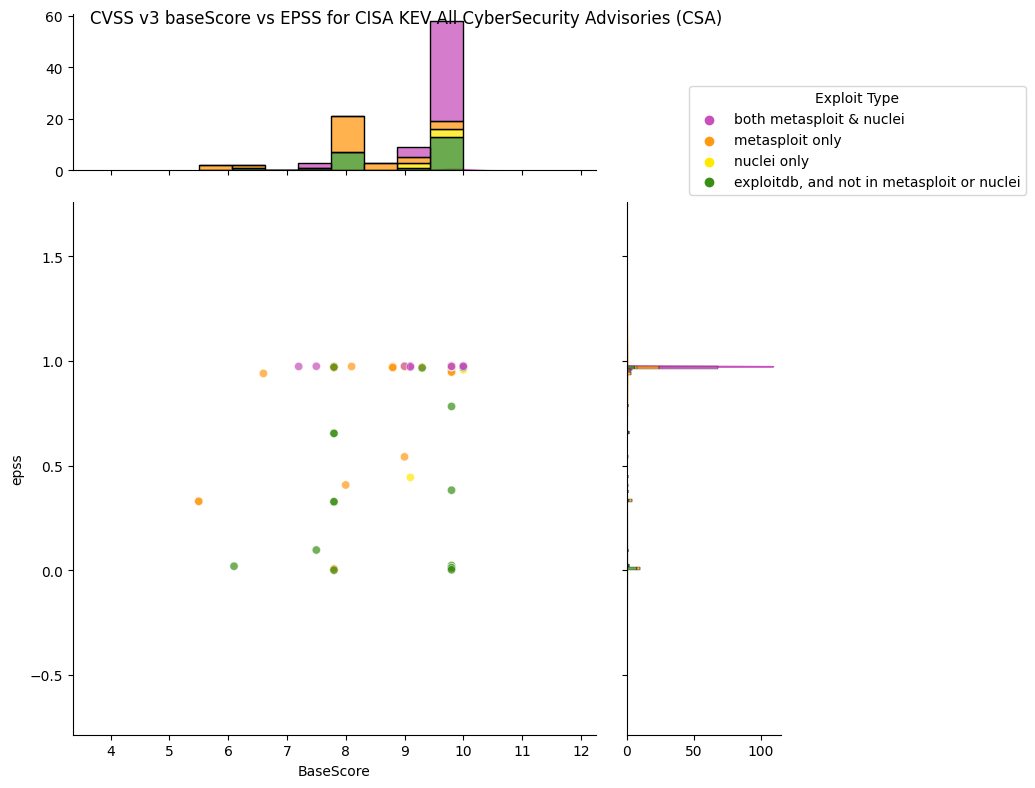

In [104]:
scatter_plot_cvss_epss_kev(df, "CVSS v3 baseScore vs EPSS for CISA KEV All CyberSecurity Advisories (CSA)")

In [108]:
df.to_csv('../data_out/cisa_kev/csa/csa.csv.gz', index=False, quoting=csv.QUOTE_NONNUMERIC, escapechar='\\', compression='gzip')
